# Leakage RB running example

In [1]:
import numpy as np

from qiskit_experiments.library import StandardRB, InterleavedRB, LeakageRB
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
import qiskit.circuit.library as circuits

# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.test.mock import FakeParis

backend = AerSimulator.from_backend(FakeParis())

In [7]:
lengths = np.arange(1, 2000, 50)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = LeakageRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

FitData(popt=array([9.99466746e-01, 4.02522776e-01, 3.06089259e-01, 5.86982618e-01,
       2.99292459e-01, 3.21234389e-01, 2.76826789e-33]), popt_keys=['lambda_1', 'lambda_2', 'A_1', 'B_1', 'C_1', 'A_2', 'B_2'], popt_err=array([2.07284830e-05, 1.37659734e+05, 1.46839257e-02, 1.39404863e-02,
       1.02355754e+05, 2.09955498e-03, 3.19669240e-03]), pcov=array([[ 4.29670008e-10,  9.33053868e-01, -3.01600711e-07,
         2.83675886e-07, -6.93764434e-01,  5.18157684e-17,
        -1.58282870e-16],
       [ 9.33053868e-01,  1.89502024e+10, -5.95635807e+02,
         5.11507642e+02, -1.40902658e+10,  1.04636216e+02,
        -1.99081626e+02],
       [-3.01600711e-07, -5.95635807e+02,  2.15617675e-04,
        -2.04171239e-04,  4.42880044e+02, -3.40741199e-14,
         1.02939107e-13],
       [ 2.83675886e-07,  5.11507642e+02, -2.04171239e-04,
         1.94337158e-04, -3.80327248e+02,  3.33350829e-14,
        -9.61504012e-14],
       [-6.93764434e-01, -1.40902658e+10,  4.42880044e+02,
        -3.

C:\Users\bkdow\anaconda3\envs\pymetal23\lib\site-packages\qiskit_experiments\curve_analysis\fit_function.py:179: RuntimeWarning: overflow encountered in power
  return amp_1 * base_1 ** (-lamb_1 * x) + amp_2 * base_2 ** (-lamb_2 * x) + baseline
C:\Users\bkdow\anaconda3\envs\pymetal23\lib\site-packages\qiskit_experiments\curve_analysis\fit_function.py:179: RuntimeWarning: invalid value encountered in power
  return amp_1 * base_1 ** (-lamb_1 * x) + amp_2 * base_2 ** (-lamb_2 * x) + baseline
C:\Users\bkdow\anaconda3\envs\pymetal23\lib\site-packages\qiskit_experiments\curve_analysis\fit_function.py:179: RuntimeWarning: overflow encountered in power
  return amp_1 * base_1 ** (-lamb_1 * x) + amp_2 * base_2 ** (-lamb_2 * x) + baseline
C:\Users\bkdow\anaconda3\envs\pymetal23\lib\site-packages\qiskit_experiments\curve_analysis\fit_function.py:179: RuntimeWarning: invalid value encountered in power
  return amp_1 * base_1 ** (-lamb_1 * x) + amp_2 * base_2 ** (-lamb_2 * x) + baseline


# Manually loading data and fitting with scipy

In [43]:
exp_data

[{'counts': {'0': 1008, '1': 16},
  'job_id': 'f251b9b2-2ccd-4fae-99a8-99297502b314',
  'metadata': {'count_ops': [[[[0], 'barrier'], [4, 1]],
    [[[0], 'rz'], [5, 1]],
    [[[0], 'sx'], [2, 1]],
    [[[0], 'x'], [1, 1]],
    [[[0], 'measure'], [1, 1]]],
   'experiment_type': 'LeakageRB',
   'group': 'Clifford',
   'interleaved': False,
   'physical_qubits': [0],
   'xval': 1},
  'shots': 1024,
  'meas_level': <MeasLevel.CLASSIFIED: 2>},
 {'counts': {'0': 978, '1': 46},
  'job_id': 'f251b9b2-2ccd-4fae-99a8-99297502b314',
  'metadata': {'count_ops': [[[[0], 'barrier'], [54, 51]],
    [[[0], 'rz'], [262, 51]],
    [[[0], 'sx'], [68, 51]],
    [[[0], 'x'], [9, 51]],
    [[[0], 'measure'], [1, 51]]],
   'experiment_type': 'LeakageRB',
   'group': 'Clifford',
   'interleaved': False,
   'physical_qubits': [0],
   'xval': 51},
  'shots': 1024,
  'meas_level': <MeasLevel.CLASSIFIED: 2>},
 {'counts': {'0': 948, '1': 76},
  'job_id': 'f251b9b2-2ccd-4fae-99a8-99297502b314',
  'metadata': {'coun

In [15]:
exp_data = expdata1.data()
import numpy as np
import matplotlib.pyplot as plt
pts=[]; chk = np.zeros(10000)
for i in range(0,200,2):
    itm = exp_data[i]
    if not itm['metadata']['interleaved']:
#    if True:
        ln = itm['metadata']['count_ops'][0][1][1]
        if chk[ln]:
            for elm in pts:
                if elm[0] == ln:
                    if itm['metadata']['interleaved']:
                        elm[1] = elm[1] + itm['counts']['0']/(itm['counts']['0']+itm['counts']['1'])
                    else:
                        elm[1] = elm[1] + itm['counts']['0']/(itm['counts']['0']+itm['counts']['1'])
                    break
        else:
            pts.append([ln,itm['counts']['0']/(itm['counts']['0']+itm['counts']['1'])])
        chk[ln] = chk[ln] + 1
pts

[[1, 2.953125],
 [101, 2.775390625],
 [201, 2.6181640625],
 [301, 2.4716796875],
 [401, 2.353515625],
 [501, 2.228515625],
 [601, 2.1162109375],
 [701, 2.087890625],
 [801, 2.005859375],
 [901, 1.9296875],
 [1001, 1.85546875],
 [1101, 1.8095703125],
 [1201, 1.802734375],
 [1301, 1.78125],
 [1401, 1.765625],
 [1501, 1.7265625],
 [1601, 1.6181640625],
 [1701, 1.669921875],
 [1801, 1.65625],
 [1901, 1.6044921875]]

Text(0.5, 1.0, 'Prob[0],0')

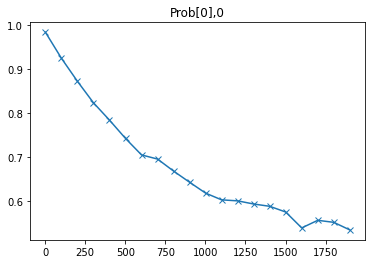

In [16]:
x1 = []; y1=[]
for elm in pts:
    x1.append(elm[0])
    y1.append(elm[1]/chk[elm[0]])

plt.plot(x1,y1,'x-')
plt.title('Prob[0],0')

Text(0.5, 1.0, 'Prob[0], All')

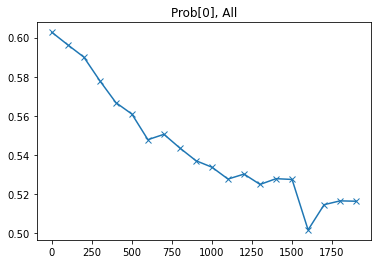

In [13]:
x2 = []; y2=[]
for elm in pts:
    x2.append(elm[0])
    y2.append(elm[1]/chk[elm[0]])

plt.plot(x2,y2,'x-')
plt.title('Prob[0], All')

[0.50096149 0.10577321 0.99885302]


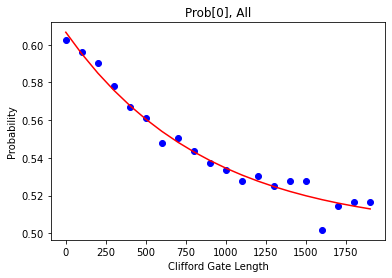

In [18]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a + b*(c**x)
popt, pcov = curve_fit(func,x2,y2,p0=(1.0,1.0,0.99))
print(popt)

curvey = func(x2,popt[0],popt[1],popt[2])

plt.plot(x2, curvey, 'red', label='The best-fit line')
plt.scatter(x2,y2, c='b',label='The data points')

plt.title('Prob[0], All')
plt.xlabel('Clifford Gate Length')
plt.ylabel('Probability')

plt.show()

[0.50240552 0.26479626 0.22036716 0.9983138 ]


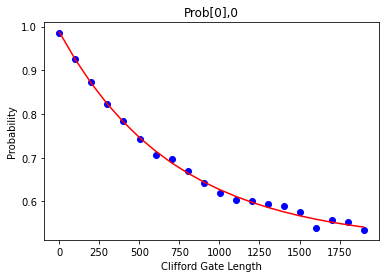

In [19]:
def func(x, a, b, d, e):
    return a + b*np.exp(np.log(0.99885302)*x)+d*(e**x)
popt, pcov = curve_fit(func,x1,y1,p0=(1.0,1.0,1.0,0.99))
print(popt)

#curvey = func(x1,popt[0],popt[1],popt[2],popt[3])
curvey = []
for elem in x1:
    curvey.append(func(elem, popt[0],popt[1],popt[2],popt[3]))

plt.plot(x1, curvey, 'red', label='The best-fit line')
plt.scatter(x1,y1, c='b',label='The data points')
plt.title('Prob[0],0')
plt.xlabel('Clifford Gate Length')
plt.ylabel('Probability')
plt.show()